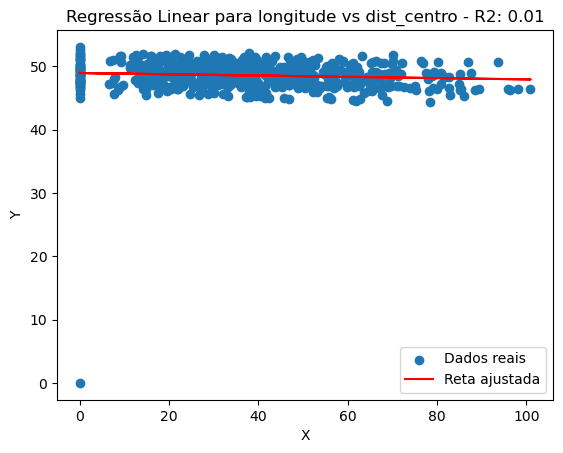

Para a regressão longitude vs dist_centro:
Coeficiente de Correlação de Pearson: -0.08
Coeficiente de Determinação (R2): 0.01




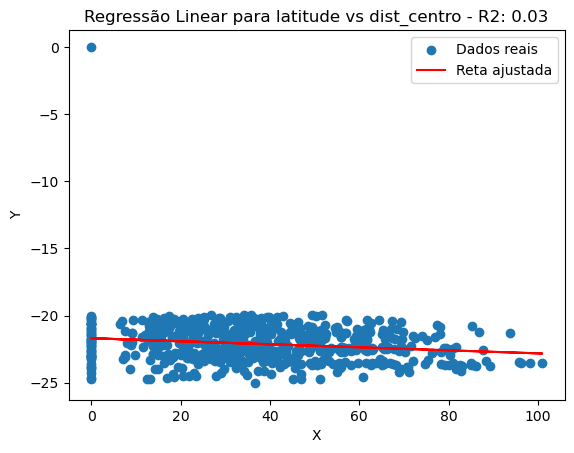

Para a regressão latitude vs dist_centro:
Coeficiente de Correlação de Pearson: -0.17
Coeficiente de Determinação (R2): 0.03




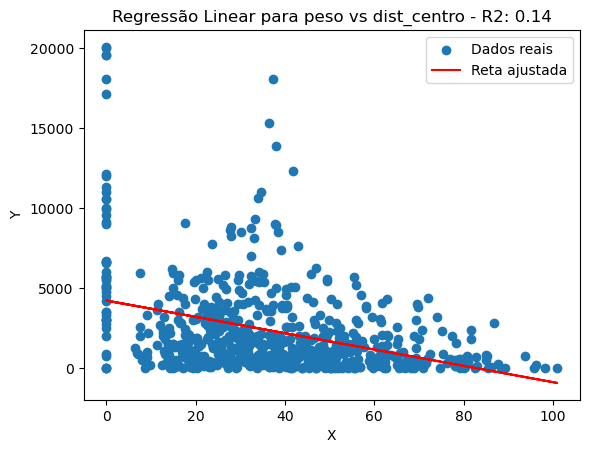

Para a regressão peso vs dist_centro:
Coeficiente de Correlação de Pearson: -0.37
Coeficiente de Determinação (R2): 0.14




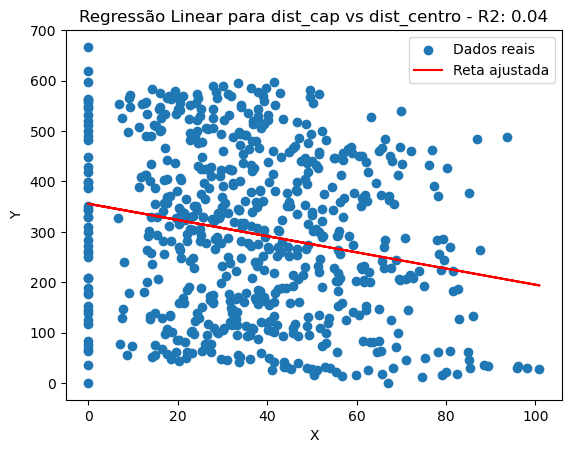

Para a regressão dist_cap vs dist_centro:
Coeficiente de Correlação de Pearson: -0.21
Coeficiente de Determinação (R2): 0.04




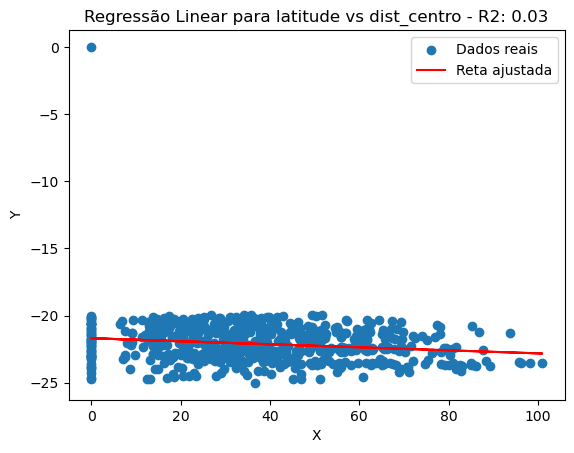

Para a regressão latitude vs dist_centro:
Coeficiente de Correlação de Pearson: -0.17
Coeficiente de Determinação (R2): 0.03


Resultados para Regressão Linear Múltipla:
                            OLS Regression Results                            
Dep. Variable:               dist_cap   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1204.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          2.33e-296
Time:                        14:04:16   Log-Likelihood:                -3527.0
No. Observations:                 646   AIC:                             7064.
Df Residuals:                     641   BIC:                             7086.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err       

In [40]:
# Feito por Guilherme de Abreu
# 22.222.028-7

############# PARTE A ###############

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Carregar o arquivo
file_path = "SantAnaBonini_2014.csv"
data = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Função para realizar regressão linear e plotar gráficos
def linear_regression_plot(x, y, variable_name):
    # Criar modelo de regressão linear
    model = LinearRegression()
    x = x.reshape(-1, 1)  # Reshape para uma única feature se x for 1D array
    model.fit(x, y)

    # Fazer previsões
    y_pred = model.predict(x)

    # Calcular métricas
    r2 = r2_score(y, y_pred)

    # Plotar gráfico
    plt.scatter(x, y, label='Dados reais')
    plt.plot(x, y_pred, color='red', label='Reta ajustada')
    plt.title(f'Regressão Linear para {variable_name} - R2: {r2:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Converter colunas relevantes para numérico, lidando com colunas de string e numéricas
for col in ['dist_centro', 'latitude', 'peso', 'dist_cap', 'longitude']:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Escolher uma variável independente
independent_var = 'dist_centro'

# Fazer cinco regressões lineares mudando a variável dependente (y)
dependent_vars = ['longitude', 'latitude', 'peso', 'dist_cap', 'latitude']

for dependent_var in dependent_vars:
    # Chamar a função de regressão linear e plotar gráfico
    linear_regression_plot(data[independent_var].values, data[dependent_var].values, f'{dependent_var} vs {independent_var}')

    # Calcular coeficiente de correlação de Pearson
    pearson_corr = data[independent_var].corr(data[dependent_var])

    # Calcular coeficiente de determinação (R2)
    x_values = data[independent_var].values.reshape(-1, 1)
    y_values = data[dependent_var].values
    model = LinearRegression()
    model.fit(x_values, y_values)
    r2 = model.score(x_values, y_values)

    # Imprimir coeficiente de correlação de Pearson e coeficiente de determinação (R2)
    print(f'Para a regressão {dependent_var} vs {independent_var}:')
    print(f'Coeficiente de Correlação de Pearson: {pearson_corr:.2f}')
    print(f'Coeficiente de Determinação (R2): {r2:.2f}')
    print('\n')




############# PARTE B ###############

import statsmodels.api as sm

# Converter colunas relevantes para numérico, lidando com colunas de string e numéricas
for col in ['dist_centro', 'longitude', 'latitude', 'peso', 'dist_cap']:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Remover linhas com valores ausentes
data = data.dropna()

# Definir variáveis independentes
independent_vars = ['dist_centro', 'longitude', 'latitude', 'peso']

# Adicionar constante para o termo de interceptação
X = sm.add_constant(data[independent_vars])

# Variável dependente (y)
dependent_var = 'dist_cap'
y = data[dependent_var]

# Ajustar o modelo de regressão linear múltipla
modelo_multi = sm.OLS(y, X).fit()

# Apresentar resultados
print("Resultados para Regressão Linear Múltipla:")
print(modelo_multi.summary())

# Remover a variável ou constante menos significativa e repetir a regressão
# Encontrar a variável ou constante menos significativa
variavel_menos_significativa = modelo_multi.pvalues.idxmax()

# Remover a variável menos significativa
X_novo = X.drop(variavel_menos_significativa, axis=1)

# Ajustar o modelo novamente após remover a variável menos significativa
modelo_multi_novo = sm.OLS(y, X_novo).fit()

# Apresentar resultados após remover variável menos significativa
print("\nResultados após remover a variável menos significativa:")
print(modelo_multi_novo.summary())





